In [31]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model,Sequential
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation



In [32]:
import pandas as pd
batchsize=8

In [33]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\Prepared_Data\train',
                                target_size=(24,24),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\Prepared_Data\train',
                                target_size=(24,24),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 64662 images belonging to 2 classes.
Found 16165 images belonging to 2 classes.


In [34]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\Prepared_Data\test',
                                target_size=(24,24),batch_size=batchsize,class_mode='categorical')

Found 4071 images belonging to 2 classes.


In [35]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\Prepared_Data\test',
                                target_size=(24,24),batch_size=batchsize,class_mode='categorical')

Found 4071 images belonging to 2 classes.


In [36]:
#Model Lenet
model = Sequential()
input_shape = (24, 24, 3) 

# First set of CONV => RELU => POOL layers
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))
model.add(Dropout(0.25))

# Second set of CONV => RELU => POOL layers
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# First (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

# Softmax classifier
model.add(Dense(2))
model.add(Activation('softmax'))



        


In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau


In [38]:
checkpoint = ModelCheckpoint(r'D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\models\model-own2.h5',
                            monitor='val_loss',save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', patience=2, verbose= 1, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=0, verbose= 1,factor=0.2, )

callbacks=[checkpoint,earlystop,learning_rate]

In [39]:
# Biên dịch model mạng: mô hình tối ưu optimize: adam 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

history = model.fit(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=6)

Epoch 1/6
8081/8082 [============================>.] - ETA: 0s - loss: 0.3134 - accuracy: 0.8617
Epoch 1: val_loss improved from inf to 0.49272, saving model to D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\models\model-own2.h5
8082/8082 [==============================] - 195s 24ms/step - loss: 0.3135 - accuracy: 0.8617 - val_loss: 0.4927 - val_accuracy: 0.7639 - lr: 0.0010
Epoch 2/6
8080/8082 [============================>.] - ETA: 0s - loss: 0.1740 - accuracy: 0.9310
Epoch 2: val_loss improved from 0.49272 to 0.45597, saving model to D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\models\model-own2.h5
8082/8082 [==============================] - 124s 15ms/step - loss: 0.1740 - accuracy: 0.9310 - val_loss: 0.4560 - val_accuracy: 0.8015 - lr: 0.0010
Epoch 3/6
8081/8082 [============================>.] - ETA: 0s - loss: 0.1400 - accuracy: 0.9471
Epoch 3: val_loss improved from 0.45597 to 0.38785, saving model to D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\models\model-

In [40]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy,lr
0,0.313453,0.861664,0.492717,0.763923,0.001
1,0.173977,0.930971,0.455971,0.801547,0.001
2,0.139969,0.947041,0.387854,0.844926,0.001
3,0.119264,0.956693,0.361382,0.849876,0.001
4,0.107241,0.960513,0.342312,0.859282,0.001
5,0.100529,0.962647,0.378474,0.847463,0.001


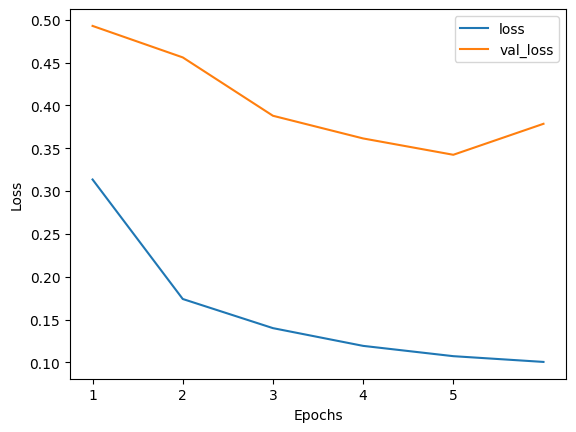

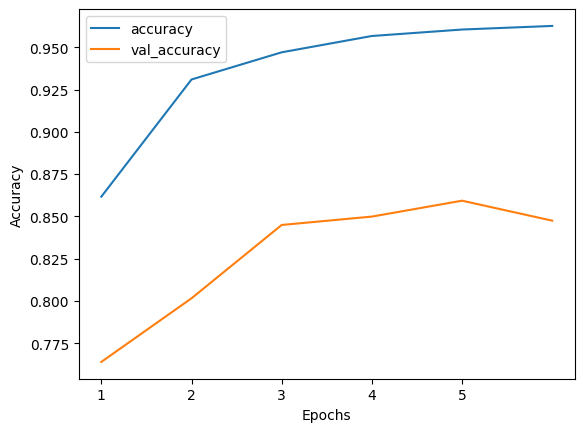

In [41]:
import matplotlib.pyplot as plt

history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(5)),list(range(1,6)))
plt.show()

history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(5)),list(range(1,6)))
plt.show()


In [42]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)       